In [1]:
'''
    -> Create a dataframe that contains climate data and display it using the method head(). 
    -> Use the OR condition to display all the rows with the minimum and maximum temperature recorded during the month.
    -> Use the value_counts() function to create a dataframe that displays the top five visibility readings.
    -> Use the function make_dashboard to make a dashboard using Temperate and Humidity (Humidity as per Temperature).

'''    

'\n    -> Create a dataframe that contains climate data and display it using the method head(). \n    -> Use the OR condition to display all the rows with the minimum and maximum temperature recorded during the month.\n    -> Use the value_counts() function to create a dataframe that displays the top five visibility readings.\n    -> Use the function make_dashboard to make a dashboard using Temperate and Humidity (Humidity as per Temperature).\n\n'

# Import Data

### Create a dataframe that contains climate data and display it using the method head()

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='njaMcdeY5hAlfGJb3l4A7TmfB4q6UpxAVIU7qmwG5tIJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'climatedataskillup-donotdelete-pr-vj0vs194esfoai'
object_key = 'Climate_Data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

climate_data_df = pd.read_csv(body)


In [3]:
climate_data_df.head(10)

,STATION,DATE,Visibility,Temperature,Humidity,WindSpeed,HourlyWindDirection
0,WBAN:94846,01-03-2014 00:51,10.00,30,56,9,330
1,WBAN:94846,01-03-2014 01:51,10.00,30,58,0,0
2,WBAN:94846,01-03-2014 02:51,6.00,29,72,8,330
3,WBAN:94846,01-03-2014 03:51,0.75,28,81,0,0
4,WBAN:94846,01-03-2014 04:51,10.00,26,78,11,350
5,WBAN:94846,01-03-2014 05:51,10.00,25,72,11,360
6,WBAN:94846,01-03-2014 06:51,5.00,23,72,7,360
7,WBAN:94846,01-03-2014 07:51,10.00,21,68,11,360
8,WBAN:94846,01-03-2014 08:51,9.00,21,65,9,360
9,WBAN:94846,01-03-2014 09:51,10.00,21,62,9,360


In [4]:
climate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATION              772 non-null    object 
 1   DATE                 772 non-null    object 
 2   Visibility           772 non-null    float64
 3   Temperature          772 non-null    int64  
 4   Humidity             772 non-null    int64  
 5   WindSpeed            772 non-null    int64  
 6   HourlyWindDirection  772 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 42.3+ KB


### Use the OR condition to display all the rows with the minimum and maximum temperature recorded during the month.

In [5]:
min_temp = climate_data_df['Temperature'].min()
max_temp = climate_data_df['Temperature'].max()

In [6]:
print(min_temp)
print(max_temp)

-1
67


In [7]:
climate_data_df[(climate_data_df['Temperature'] ==  max_temp) | (climate_data_df['Temperature'] ==  min_temp)]


,STATION,DATE,Visibility,Temperature,Humidity,WindSpeed,HourlyWindDirection
53,WBAN:94846,03-03-2014 03:51,10.0,-1,46,9,350
54,WBAN:94846,03-03-2014 04:51,10.0,-1,46,13,350
55,WBAN:94846,03-03-2014 05:51,10.0,-1,51,11,340
762,WBAN:94846,31-03-2014 12:51,10.0,67,24,23,160
763,WBAN:94846,31-03-2014 13:51,10.0,67,25,26,170


### Use the value_counts() function to create a dataframe that displays the top five visibility readings.

In [8]:
# using the value_counts on 'Visibillity' column

In [9]:
all_visibility_values = climate_data_df['Visibility'].value_counts()

In [10]:
top_five_visibility_readings_df = pd.DataFrame(all_visibility_values.head(5))

In [11]:
top_five_visibility_readings_df

,Visibility
10.0,648
8.0,23
6.0,16
9.0,16
4.0,13


### Use the function make_dashboard to make a dashboard using Temperate and Humidity (Humidity as per Temperature).

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
temperature_n_humidity_df =climate_data_df[['Temperature', 'Humidity']]

In [23]:
temperature_n_humidity_df.head(5)

,Temperature,Humidity
0,30,56
1,30,58
2,29,72
3,28,81
4,26,78


In [51]:
def make_dashboard(df):
    temp = list(df['Temperature'])
    humidity = list(df['Humidity'])
    print(type(temp))
    print(type(humidity))
    
    plt.figure(figsize=(7,7))
    plt.scatter(temp,humidity,color='orange',alpha=0.4)
    plt.xlabel('Temperature in Fahrenheit ')
    plt.ylabel('Humidity')
    plt.title('Climate Data (HUMIDITY as per TEMPERATURE)')
    plt.grid(True)
    plt.show()
    

<class 'list'>
<class 'list'>


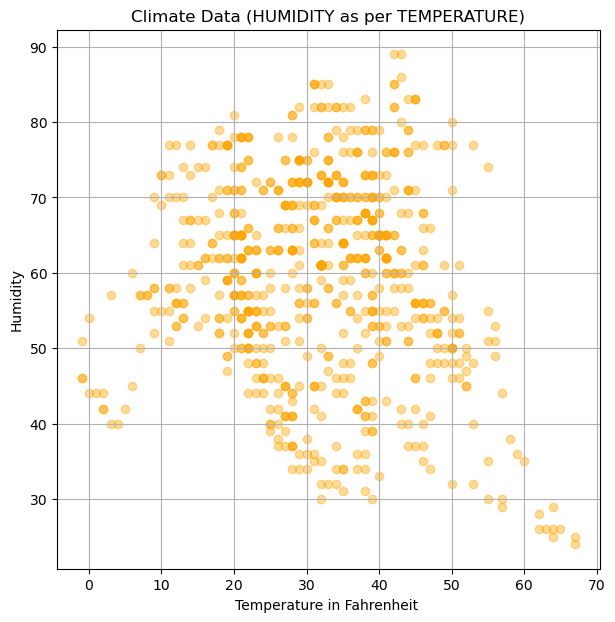

In [52]:
make_dashboard(temperature_n_humidity_df)